In [1]:
import json
from matplotlib import pyplot as plt
import numpy as np
from collections import defaultdict
def lj(a):
    with open(a) as f:
        return json.load(f)

GLIDE_result=lj("/mnt/home/syn4det/reseg/full/LVIS_gen_FG/results.json")
stable_result=lj("/mnt/home/syn4det/reseg/full/LVIS_gen_FG_2/results.json")
retrieval_result=lj("/mnt/data/LVIS_retrieval/results_100.json")
cc=lj('/mnt/data/LVIS/lvis_v1_val.json')['categories']
cr={i['name']:i['id']-1 for i in cc}
crr={i['id']-1:i['name'] for i in cc}

In [2]:
GLIDE_clips=dict(r={},f={},c={})
for i in GLIDE_result:
    GLIDE_clips[i['frequency']][i['name']]=i['clip_scores']
        
stable_clips=dict(r={},f={},c={})
for i in stable_result:
    stable_clips[i['frequency']][i['name']]=i['clip_scores']

for i in 'cfr':
    for j in [GLIDE_clips,stable_clips]:
        s=[]
        for t in j[i]:
            s+=j[i][t]
        j[i+'_all']= s

In [3]:
retrieval_result['monitor_(computer_equipment) computer_monitor']=retrieval_result['monitor_(computer_equipment)_computer_monitor']
rs={i['name']:i['frequency'] for i in GLIDE_result}
del retrieval_result['monitor_(computer_equipment)_computer_monitor']
retrieval_clips=dict(r=[],f=[],c=[])
for i in retrieval_result:
    for j in retrieval_result[i]:
        retrieval_clips[rs[i]].append(retrieval_result[i][j])

In [14]:
len(GLIDE_clips['f'])

405

In [4]:
bins = np.arange(40)
def hist(x,accu=True):
    s=np.histogram(x, bins = bins)[0]/len(x)
    if not accu:
        return s
    for i in range(len(s)):
        s[i]=np.sum(s[i:])
    return s



def hist2(x):
    c=np.array([hist(x[i]) for i in x])
    c_u=c.max(axis=0)
    c_l=c.min(axis=0)
    return c_l,c_u

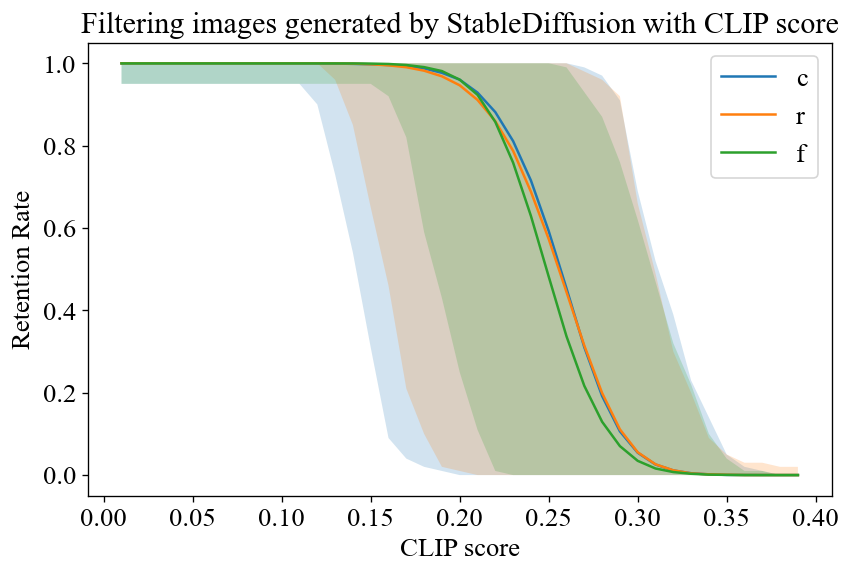

In [8]:
csfont = {'fontname':'Times New Roman'}
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('font', size=16)
plt.rc('axes', titlesize=18)
plt.figure(figsize=(8, 5), dpi=120)
plt.title('Filtering images generated by StableDiffusion with CLIP score')
plt.ylabel('Retention Rate')
plt.xlabel('CLIP score')
xt=bins[1:]*0.01
for i in 'crf':
    plt.plot(xt,hist(stable_clips[i+"_all"]),label=i)
    c_l,c_u=hist2(stable_clips[i])
    plt.fill_between(xt,c_l,c_u,alpha=0.2)
plt.legend()
plt.savefig('output.pdf')

In [ ]:
csfont = {'fontname':'Times New Roman'}
plt.rcParams["font.family"] = "Times New Roman"
plt.figure(figsize=(8, 4), dpi=120)
plt.title('clip score of images generated by StableDiffusion')
plt.ylabel('frequency')
plt.xlabel('clip score')
plt.plot(bins[1:]*0.01,hist(stable_clips['r']),label='r')
plt.plot(bins[1:]*0.01,hist(stable_clips['f']),label='f')
plt.plot(bins[1:]*0.01,hist(stable_clips['c']),label='c')
plt.legend()
plt.savefig('output.pdf')

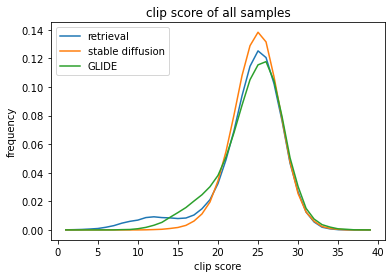

In [44]:
retrieval_clips['all']=sum([retrieval_clips[i]  for i in retrieval_clips],start=[])
stable_clips['all']=sum([stable_clips[i]  for i in stable_clips],start=[])
GLIDE_clips['all']=sum([GLIDE_clips[i]  for i in GLIDE_clips],start=[])
csfont = {'fontname':'Times New Roman'}
plt.rcParams["font.family"] = "Times New Roman"
plt.figure()
plt.title('clip score of all samples')
plt.ylabel('frequency')
plt.xlabel('clip score')
plt.plot(bins[1:],hist(retrieval_clips['all']),label='retrieval')
plt.plot(bins[1:],hist(stable_clips['all']),label='stable diffusion')
plt.plot(bins[1:],hist(GLIDE_clips['all']),label='GLIDE')
plt.legend()


In [50]:
np.mean(stable_clips['all'])

24.24914452150873